### Nonlinear logistic regression

##### 1.1 Plot data in X and y

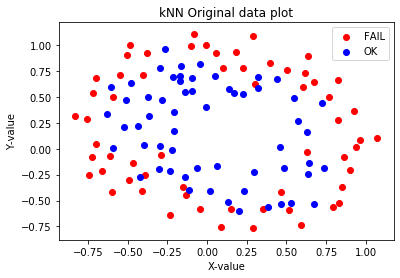

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
from matplotlib.colors import ListedColormap
import util

data = np.genfromtxt(path.join('data/microchips.csv'), delimiter=',', dtype=float)

failed = list(filter(lambda chip: chip[2] == 0, data))
ok = list(filter(lambda chip: chip[2] == 1, data))

x_f, y_f, z_f = list(zip(*failed))
plt.scatter(x_f, y_f, color='r')
x_ok, y_ok, z_ok = list(zip(*ok))
plt.scatter(x_ok, y_ok, color='b')

plt.xlabel('X-value')
plt.ylabel('Y-value')
plt.legend(['FAIL', 'OK'])
plt.title("kNN Original data plot")
plt.show()

##### 1.2 Find beta of degree 2 model, print parameters and plot cost functions with iterations.

 

Errors:  17


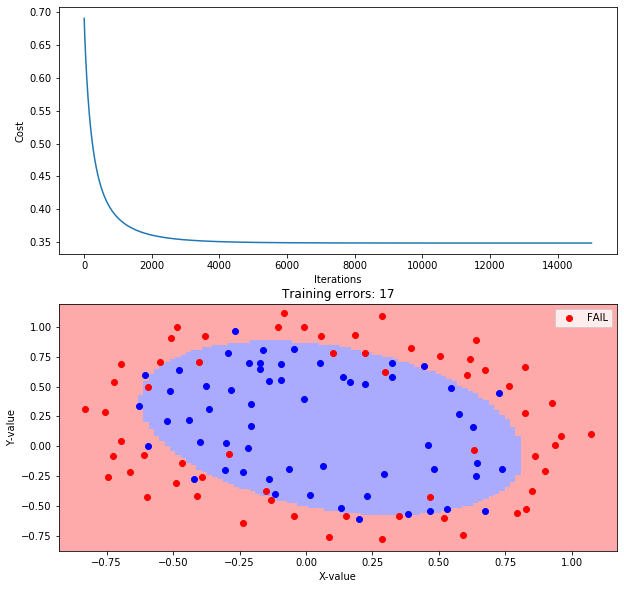

In [2]:
X = np.array([data[:, 0], data[:, 1]]).T
y = np.array([data[:, 2]]).T

Xe = util.mapFeature(X[:, 0], X[:, 1], 2)
beta = np.array([0, 0, 0, 0, 0, 0]).reshape(-1, 1)
iterations = 15_000
alpha = 0.5
beta, plots = util.GDLogistic(iterations, alpha, beta, Xe, y, True)
errs = util.trainingErrs(Xe, beta, y)

# Define figures
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

# Cost function
ax = plt.subplot(2, 1, 1)
ax.plot(range(0, iterations), plots)
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Boundary

ax = plt.subplot(2, 1, 2)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  # Mesh Grid
x1, x2 = xx.ravel(), yy.ravel()
XXe = util.mapFeature(x1, x2, 2)  # Turn to two Nx1 arrays
p = util.sigmoid(np.dot(XXe, beta))  # classify mesh ==> probabilities
classes = p > 0.5  # round off probabilities
clz_mesh = classes.reshape(xx.shape)  # return to mesh format
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # mesh plot
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # colors
ax.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)
ax.scatter(x_f, y_f, color='r')
ax.legend(['FAIL', 'OK'])
plt.xlabel('X-value')
plt.ylabel('Y-value')
ax.set_title(f"Training errors: {errs}")
ax.scatter(x_ok, y_ok, color='b')
plt.show()

##### 1.3 Map features
The implementation of function mapFeature is found in util class.

##### 1.4 Repeat task 2 with polynomial degree 5

Errors:  14


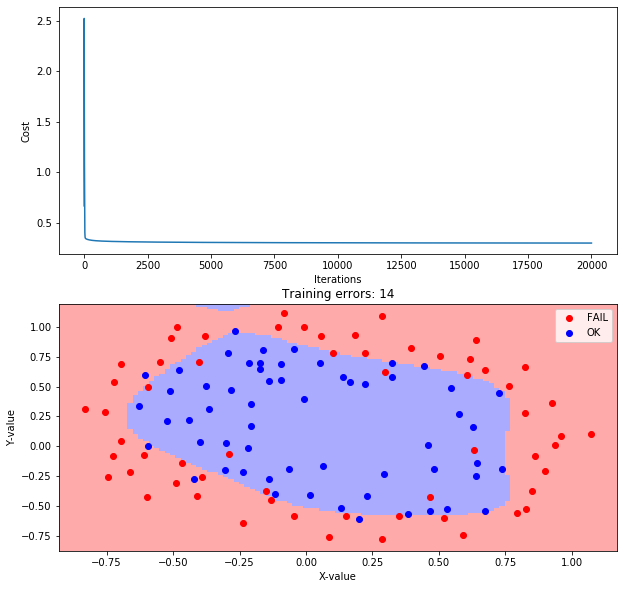

In [3]:
Xe = util.mapFeature(X[:, 0], X[:, 1], 5)
beta = np.array(np.zeros(21)).reshape(-1, 1)
iterations = 20_000
alpha = 15
beta, plots = util.GDLogistic(iterations, alpha, beta, Xe, y, True)
errs = util.trainingErrs(Xe, beta, y)

# Define figures
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

# Cost function
ax = plt.subplot(2, 1, 1)
ax.plot(range(0, iterations), plots)
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Boundary
ax = plt.subplot(2, 1, 2)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  # Mesh Grid
x1, x2 = xx.ravel(), yy.ravel()
XXe = util.mapFeature(x1, x2, 5)  # Turn to two Nx1 arrays
p = util.sigmoid(np.dot(XXe, beta))  # classify mesh ==> probabilities
classes = p > 0.5  # round off probabilities
clz_mesh = classes.reshape(xx.shape)  # return to mesh format
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # mesh plot
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # colors
ax.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)
ax.scatter(x_f, y_f, color='r')

plt.xlabel('X-value')
plt.ylabel('Y-value')
ax.set_title(f"Training errors: {errs}")
ax.scatter(x_ok, y_ok, color='b')
ax.legend(['FAIL', 'OK'])
plt.show()